Using Artificial Neural networks implement a classifier to recognize the characters in your name(handwritten). 

# Dataset:
The dataset taken is emnist dataset which is openly available. It contain 28*28 pixel images of different latters mapped to corresponding characters. The train dataset contain 88799 rows along with 784 attributes in which each attributes have a value between 0 and 256. These values represent the pixel values of corresponding row. The link to dataset is :https://www.kaggle.com/crawford/emnist.


The program is done with python in google colab. 

#Approach :
First the dataset is taken and pre-processed. The two types of approach are taken. First the model is trained with a simple ANN with two layers. The prediction was low as expected. The data is the trained using a convolution network which provided a very good accuracy. The convolution network contain two convolution layers with 32 filters each of size (3,3). The activation function used in these two layers are relu. The output of this layer is then passed through a max pool layer of size (2,2). Finally, the output is flattened and passed through a dense layers.



In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, BatchNormalization
from keras.optimizers import adam
from matplotlib import pyplot as plt

Using TensorFlow backend.


Importing dataset (from google drive)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
img_rows, img_cols = 28, 28

# importing data
letter_file = "/content/drive/My Drive/input/emnist-letters-train.csv"
test_file = "/content/drive/My Drive/input/emnist-letters-test.csv"
num_classes = 37
classes = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

Function required for preprocessing

In [0]:
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)

    x = raw[:, 1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [0]:
def decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

In [0]:
def show_img(img,label):
    img_flip = np.transpose(img, axes=[1,0])
    plt.title('Label: ' + str(classes[decode_label(label)]))
    plt.imshow(img_flip, cmap='Greys_r')

In [0]:
def eval_model(model,test_x,test_y):
    result = model.evaluate(test_x, test_y)
    print("The accuracy of the model is: ",result[1])
    return result

In [0]:
letter_data = np.loadtxt(letter_file, skiprows=1, delimiter=',')
x, y = prep_data(letter_data)

In [9]:
x.shape

(88799, 28, 28, 1)

In [10]:
y.shape

(88799, 37)

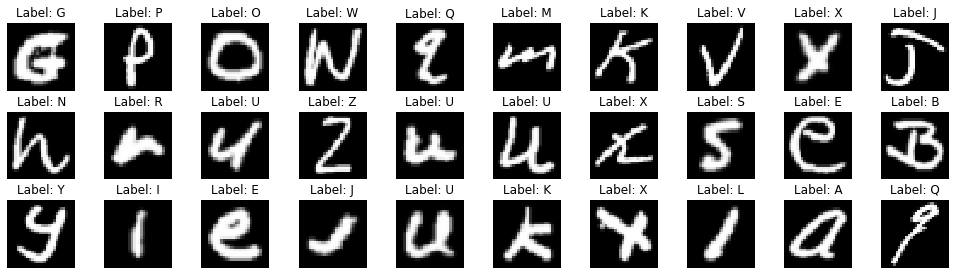

In [11]:
fig = plt.figure(figsize=(17,4.5))
for idx in range(30):
    fig.add_subplot(3,10,idx+1)
    plt.axis('off')
    show_img(np.squeeze(x[idx]),y[idx])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [0]:
def prep_data_simple(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    x = raw[:, 1:]
    x = x / 255
    return x, out_y

Simple ANN Model

In [13]:
simple_letter_data = np.loadtxt(letter_file, skiprows=1, delimiter=',')
Sx, Sy = prep_data_simple(simple_letter_data)
Sx.shape
Sy.shape

(88799, 37)

In [14]:
simple_test_data = np.loadtxt(test_file, skiprows=1, delimiter=',')
S_test_x, S_test_y = prep_data_simple(simple_test_data)
S_test_y.shape
S_test_x.shape

(14799, 784)

In [0]:
def simplemodel():
  model = Sequential()
  model.add(Dense(500,input_shape=(784,)))
  model.add(Dense(500,activation ='relu'))
  model.add(Dense(37,activation = 'softmax'))
  model.compile (adam(lr = .1), loss = 'categorical_crossentropy',metrics = ['accuracy'])
  model.summary()
  return model

In [16]:
s_model = simplemodel()
s_model.fit(Sx,Sy,epochs = 10,validation_split = .1)






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 37)                18537     
Total params: 661,537
Trainable params: 661,537
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 79919 samples, validate on 8880 samples
Epoch 1/10





79919/79919 [==============================] - 32s 404us/step - loss: 15.4956 - acc: 0.0383 - val_loss: 15.4447 - val_acc: 0.0418
Epoch 2/10
79919/79919 [==============================] - 31s 387us/step - loss: 

The validation accuracy itself is very low. There is no point in testing it

A complex CNN Model

In [0]:
test_data = np.loadtxt(test_file, skiprows=1, delimiter=',')
test_x, test_y = prep_data(test_data)

In [19]:
test_x.shape
test_y.shape

(14799, 37)

Creating Model with two convolution layer and two max pool layers

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

Training Model

In [21]:
batch_size = 128
basic_history = model.fit(x, y,
          batch_size = batch_size,
          epochs = 10,
          validation_split = 0.2)


Train on 71039 samples, validate on 17760 samples
Epoch 1/10
71039/71039 [==============================] - 116s 2ms/step - loss: 0.6582 - acc: 0.8008 - val_loss: 0.3680 - val_acc: 0.8848
Epoch 2/10
71039/71039 [==============================] - 116s 2ms/step - loss: 0.3006 - acc: 0.9022 - val_loss: 0.2914 - val_acc: 0.9096
Epoch 3/10
71039/71039 [==============================] - 115s 2ms/step - loss: 0.2304 - acc: 0.9229 - val_loss: 0.2880 - val_acc: 0.9101
Epoch 4/10
71039/71039 [==============================] - 115s 2ms/step - loss: 0.1907 - acc: 0.9337 - val_loss: 0.2771 - val_acc: 0.9136
Epoch 5/10
71039/71039 [==============================] - 115s 2ms/step - loss: 0.1591 - acc: 0.9437 - val_loss: 0.2786 - val_acc: 0.9172
Epoch 6/10
71039/71039 [==============================] - 115s 2ms/step - loss: 0.1331 - acc: 0.9515 - val_loss: 0.2863 - val_acc: 0.9169
Epoch 7/10
71039/71039 [==============================] - 115s 2ms/step - loss: 0.1146 - acc: 0.9569 - val_loss: 0.2865 -

In [22]:
eval_model(model,test_x,test_y)

14799/14799 [==============================] - 6s 389us/step
The accuracy of the model is:  0.9006013919899726


[0.401874802375065, 0.9006013919899726]

Taking Characters in my name

In [27]:
my_chars = ['A','M','E','N']
my_index = []
i=0
while(len(my_chars)>0 ):
  label = test_y[i]
  if str(classes[decode_label(label)]) in my_chars:
    print(i)
    my_index.append(i)
    my_chars.remove(str(classes[decode_label(label)]))
  i+=1

0
3199
9599
10399


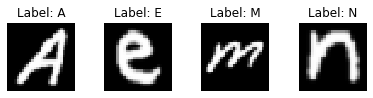

In [35]:
y_pred = []
fig = plt.figure(figsize=(17,4.5))
i=0
for index in my_index:
  sample_x= test_x[index:index+1,]
  y_pred.append( model.predict(sample_x))
  fig.add_subplot(3,10,i+1)
  plt.axis('off')
  show_img(np.squeeze(test_x[index]),test_y[index])
  i+=1
plt.subplots_adjust(wspace=0.3, hspace=0.3)

